In [234]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from coffea import hist, processor
import coffea
import uproot
import sys
sys.path.insert(0,"../")
# from corrections import add_pileup_weight

import pickle
import glob

In [235]:
def rename(name):
    if "HNL" in name:
        m = name.split("_")[2].replace("mHNL","").replace("p0","GeV")
        if "rwctau" in name:
            ct = (name.split("_")[-1].replace("rwctau",""))                
        else:
            ct = (name.split("_")[-1].replace("pl",""))
        label = "_".join([m,ct+"mm"])
    elif "WJet" in name:
        label= "WJetsToLNu"
    elif "EGamma" in name:
        label = "EGamma"
    return label
    

In [284]:
import HNLprocessor.corrections as corrections

xsections = corrections.load_xsection()

with open('../HNL_histograms_all_Sep17.pickle','rb') as f:                
    out = pickle.load(f)
    
    
lumi = 137 ## fb
# lumi = 1./1000 ## fb
# lumi = 0.939 ## fb
    
for k,h in out.items():
    print(k,)
    if (type(h)!=hist.Hist): continue
    h.scale({ d: lumi for d in h.identifiers("dataset") if d.name in xsections.keys()}, axis="dataset")
#     h.scale({ d: lumi*out['sumw'][d.name]/xsections[d.name] for d in h.identifiers("dataset") if d.name in xsections.keys()}, axis="dataset")    
#     print({ d:lumi for d in h.identifiers("dataset") if d.name in xsections.keys()})


sumw
nCluster
nCluster_n-1
accept
ClusterSize
ClusterTime
dphi_cluster_lep
nLeptons
lepPt
lepEta
nJets
jetPt
jetMet_dPhi
metXYCorr
MT
nPU
nPU_noweight
gWPt
gWPt_noweight
glepdPhi
gLepPt
gLLP_e
gLLP_pt
gLLP_eta


In [142]:
out["sumw"]

defaultdict_accumulator(float,
                        {'HNL_electronType_mHNL1p0_pl10': 662099.0,
                         'HNL_electronType_mHNL1p0_pl1000': 661983.0,
                         'HNL_electronType_mHNL1p0_pl100': 659831.0,
                         'WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8': 1297009.0,
                         'EGamma_2018A': 1126568.0,
                         'HNL_electronType_mHNL10p0_pl100': 659380.0,
                         'HNL_electronType_mHNL10p0_pl10000': 659548.0,
                         'HNL_electronType_mHNL10p0_pl1000': 660862.0,
                         'HNL_electronType_mHNL7p0_pl100': 661539.0,
                         'HNL_electronType_mHNL7p0_pl10000': 660151.0,
                         'HNL_electronType_mHNL7p0_pl1000': 661246.0,
                         'HNL_electronType_mHNL4p0_pl100': 661978.0,
                         'HNL_electronType_mHNL4p0_pl1000_rwctau2000': 660231.0,
                         'HNL_electronType_mHNL4p0_pl

In [285]:
out["sumw"]["HNL_electronType_mHNL1p0_pl10"]

662099.0

In [130]:
13957.00114851

13957.00114851

In [160]:
for d,v in out["accept"].project("gLLP_csc","dataset")[datasets].values('true').items():
    print(d,v[0],v[1])
#     print(d,v[0][1]/v[0].sum())

('HNL_electronType_mHNL1p0_pl1000',) [55.84475524 21.59539263] [1.60783126 0.646984  ]
('HNL_electronType_mHNL1p0_pl100',) [405.52809657 739.70247554] [115.66723496 224.05557501]
('HNL_electronType_mHNL4p0_pl100',) [0.26814219 0.15444012] [6.99407136e-05 4.43919742e-05]
('HNL_electronType_mHNL4p0_pl1000',) [0.04455643 0.06623411] [1.20813246e-06 1.88389208e-06]
('HNL_electronType_mHNL2p0_pl100',) [10.25837843 16.45571555] [0.08990392 0.1623076 ]
('HNL_electronType_mHNL2p0_pl1000',) [1.62513323 1.29231568] [0.00145996 0.00123652]


# Cutflow tables

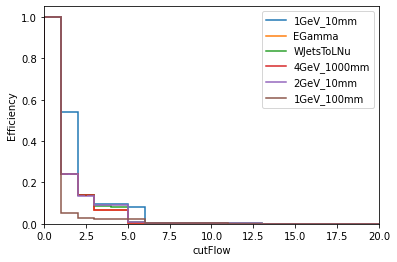

In [345]:
h = out['nCluster']
h = h.integrate("region","ele_ABCD_cf2").project('cutFlow',"dataset")

h.label="Efficiency"
norm = {}

table = {}
table_rel={}
table_abs={}
datasets = [
    "HNL_electronType_mHNL1p0_pl10",
    "HNL_electronType_mHNL1p0_pl100",
#     "HNL_electronType_mHNL1p0_pl1000",    
    "HNL_electronType_mHNL2p0_pl10",
#     "HNL_electronType_mHNL2p0_pl1000",
#     "HNL_electronType_mHNL4p0_pl100",
    "HNL_electronType_mHNL4p0_pl1000",  
    "WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8",
    "EGamma_2018A"
]

for d,cutflow in h[datasets].values().items():
    name = d[0]
    label=rename(name)    
    norm[d[0]]=1./cutflow[0]    
#     table[label] = np.round(cutflow/cutflow[0]*100,2)[1:17]  #w.r.t. total
#     table[label] = np.round(cutflow/cutflow[1]*100,2)[1:17]    #w.r.t. accept
#     table_rel[label] = np.round(cutflow[1:17]/cutflow[0:16]*100,2)
#     table_abs[label] = np.round(cutflow,4)[1:17]    
#   Background
    table[label] = np.round(cutflow/cutflow[0]*100,4)[1:16]    #w.r.t. accept
    table_rel[label] = np.round(cutflow[1:16]/cutflow[0:15]*100,4)    
    table_abs[label] = np.round(cutflow,4)[1:16]
    
h.scale(norm, "dataset")    
ax = hist.plot1d(h[datasets],overlay='dataset')
ax.legend(table.keys())

In [346]:
table

{'1GeV_10mm': array([2.40109e+01, 1.36865e+01, 6.62680e+00, 6.59690e+00, 3.47700e-01,
        4.24000e-02, 3.88000e-02, 3.84000e-02, 3.82000e-02, 3.81000e-02,
        1.45000e-02, 1.33000e-02, 8.00000e-04, 8.00000e-04, 0.00000e+00]),
 'EGamma': array([5.41996e+01, 1.38676e+01, 9.55850e+00, 9.55370e+00, 8.25250e+00,
        5.28100e-01, 4.73400e-01, 4.71900e-01, 4.69600e-01, 4.67700e-01,
        7.70000e-02, 4.35000e-02, 3.70000e-03, 2.70000e-03, 2.00000e-04]),
 'WJetsToLNu': array([5.2042e+00, 2.9073e+00, 2.1811e+00, 2.1806e+00, 2.1024e+00,
        2.6570e-01, 2.4230e-01, 2.4180e-01, 2.4080e-01, 2.3960e-01,
        2.3100e-02, 1.7900e-02, 3.9000e-03, 2.2000e-03, 5.0000e-04]),
 '4GeV_1000mm': array([23.857 , 13.4945,  9.1336,  9.0615,  0.7005,  0.2807,  0.2575,
         0.2516,  0.2454,  0.2411,  0.2066,  0.2016,  0.1221,  0.1083,
         0.0479]),
 '2GeV_10mm': array([2.40328e+01, 1.37120e+01, 6.58540e+00, 6.57990e+00, 2.79400e-01,
        2.99000e-02, 2.60000e-02, 2.60000e-02, 2.6000

In [347]:
## cutflow 
# cols=["Acceptance",'trigger','Nlep>=1','MET',"METfilters",
#  'n_cls',"JetVeto","MuVeto","ME11_12","MB1seg","RB1","Time","TimeSpread","ClusID"]

## cutflow cf2
# cols = ["Acceptance",'trigger','Nlep>=1','MET',"METfilters",
# 'n_cls',"ME11_12","JetVeto","MuVeto","MB1seg","RB1","Time","TimeSpread","ClusID"]


# cols=['trigger','Nlep>=1','MET',"METfilters",
#  'n_cls',"JetVeto","MuVeto","ME11_12","MB1seg","RB1","Time","TimeSpread","ClusID"]
#cf2 for background
cols = ['trigger','Nlep>=1','MET',"METfilters",
'n_cls',"ME11_12","JetVeto","MuVeto","MB1seg","RB1","Time","TimeSpread","ClusID",'dphi_MET',
       "dphi_lep"]
# cols = ["Acceptance",'trigger','Nlep>=1','MET',"METfilters",
# 'n_cls',"ME11_12","JetVeto","MuVeto","MB1seg","RB1","Time","TimeSpread","ClusID",'dphi_MET',
#        "dphi_lep"]

import pandas as pd
df = pd.DataFrame.from_dict(table_rel,orient="index",columns=cols)
df_rel = df.transpose().sort_index(1)
df = pd.DataFrame.from_dict(table,orient="index",columns=cols)
df_cum = df.transpose().sort_index(1)
df = pd.DataFrame.from_dict(table_abs,orient="index",columns=cols)
df_abs = df.transpose().sort_index(1)


In [348]:
df_rel

,1GeV_100mm,1GeV_10mm,2GeV_10mm,4GeV_1000mm,EGamma,WJetsToLNu
trigger,24.0589,24.0109,24.0328,23.8570,54.1996,5.2042
Nlep>=1,56.9676,57.0011,57.0551,56.5643,25.5861,55.8654
MET,61.7648,48.4186,48.0265,67.6839,68.9273,75.0212
METfilters,98.0665,99.5487,99.9174,99.2107,99.9489,99.9788
n_cls,9.6610,5.2704,4.2469,7.7306,86.3809,96.4113
ME11_12,39.5503,12.2068,10.7027,40.0649,6.3988,12.6375
JetVeto,90.4921,91.4591,86.8687,91.7431,89.6453,91.1782
MuVeto,96.6209,98.8327,100.0000,97.7059,99.6812,99.8090
MB1seg,96.8852,99.6063,100.0000,97.5316,99.5109,99.5855
RB1,98.4772,99.6047,100.0000,98.2716,99.6030,99.4877


In [349]:
df_cum

,1GeV_100mm,1GeV_10mm,2GeV_10mm,4GeV_1000mm,EGamma,WJetsToLNu
trigger,24.0589,24.0109,24.0328,23.8570,54.1996,5.2042
Nlep>=1,13.7058,13.6865,13.7120,13.4945,13.8676,2.9073
MET,8.4654,6.6268,6.5854,9.1336,9.5585,2.1811
METfilters,8.3017,6.5969,6.5799,9.0615,9.5537,2.1806
n_cls,0.8020,0.3477,0.2794,0.7005,8.2525,2.1024
ME11_12,0.3172,0.0424,0.0299,0.2807,0.5281,0.2657
JetVeto,0.2870,0.0388,0.0260,0.2575,0.4734,0.2423
MuVeto,0.2773,0.0384,0.0260,0.2516,0.4719,0.2418
MB1seg,0.2687,0.0382,0.0260,0.2454,0.4696,0.2408
RB1,0.2646,0.0381,0.0260,0.2411,0.4677,0.2396


In [302]:
len(cutflow1)

8

In [136]:
[i for i,c in enumerate(cutflow1)]

[0, 1, 2, 3, 4, 5, 6, 7]

# N-1 cut flow

In [206]:
h = out['nCluster_n-1']
h = h.project('Nminus1',"dataset")

h.label="Efficiency"
norm = {}

table = {}
table2= {}
datasets = [
    "HNL_electronType_mHNL1p0_pl10",
#     "HNL_electronType_mHNL1p0_pl100",
#     "HNL_electronType_mHNL1p0_pl1000",    
    "HNL_electronType_mHNL2p0_pl10",
#     "HNL_electronType_mHNL2p0_pl1000",
    "HNL_electronType_mHNL4p0_pl100",
#     "HNL_electronType_mHNL4p0_pl1000",  
    "WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8",
    "EGamma_2018A"
]
for d,cutflow in h[datasets].values().items():
    name = d[0]
    label=rename(name)
    data = np.round(cutflow/cutflow[1]*100,3)
    data = data[data!=0.0]    
#     print(label,data)
    table[label] = data
    data2 = data[2:]-data[-1]
    table2[label] = data2
    
cols = ["Inclusive","Presel","ME11_12","JetVeto","MuVeto","MB1seg","RB1",
                            "Time","TimeSpread","ClusID","all"]
    
df = pd.DataFrame.from_dict(table,orient="index",columns=cols)
df = df.transpose().sort_index(1)


In [212]:
cols = ["ME11_12","JetVeto","MuVeto","MB1seg","RB1","Time","TimeSpread","ClusID","all"]
    
df = pd.DataFrame.from_dict(table2,orient="index",columns=cols)
df = df.transpose().sort_index(1)

In [213]:
df

,1GeV_10mm,2GeV_10mm,4GeV_100mm,EGamma,WJetsToLNu
ME11_12,0.000,0.108,0.549,0.015,0.015
JetVeto,0.043,0.000,0.087,0.001,0.000
MuVeto,1.867,0.649,3.819,0.650,0.616
MB1seg,0.000,0.000,0.000,0.001,0.000
RB1,0.000,0.000,0.029,0.002,0.004
Time,1.390,1.514,0.723,0.281,2.076
TimeSpread,0.043,0.000,0.058,0.029,0.026
ClusID,3.692,1.135,12.963,0.530,0.715
all,0.000,0.000,0.000,0.000,0.000
